## Import Package and Define functions



In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import sklearn
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import PolynomialFeatures
import os

In [2]:
def mae(pred, test):
    error = 0
    for i in range(len(pred)):
        # calculate the absolute value for the error
        error += np.abs(pred[i]-test[i])

    return error/len(pred)

## Loading Dataset



In [3]:
store_df = pd.read_csv('Stores.csv')
store_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


## EDA



In [4]:
store_df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [5]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [6]:
# transform store area to Dtype: List
Store_area = list(store_df['Store_Area'])
Store_scale = []

for area in Store_area:
    if area < 1300:
        Store_scale.append('small')
    elif area > 1700:
        Store_scale.append('large')
    else:
        Store_scale.append('medium')

store_df['Store_Scale'] = Store_scale


In [7]:

Store_sales = list(store_df['Store_Sales'])
Store_income = []
for sales in Store_sales:
    if sales < 35000:
        Store_income.append('low-income')
    elif sales > 70000:
        Store_income.append('high-income')
    else:
        Store_income.append('medium-income')

store_df['Income'] = Store_income

In [8]:
# new store dataframe
store_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Scale,Income
0,1,1659,1961,530,66490,medium,medium-income
1,2,1461,1752,210,39820,medium,medium-income
2,3,1340,1609,720,54010,medium,medium-income
3,4,1451,1748,620,53730,medium,medium-income
4,5,1770,2111,450,46620,large,medium-income


In [9]:
store_df['Store_Scale'].unique()

# create new feature called 'cus/sqr'

store_df['cus/sqr'] = store_df['Daily_Customer_Count']/store_df['Store_Area']
store_df.drop(columns='Store ID ')
store_df


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Scale,Income,cus/sqr
0,1,1659,1961,530,66490,medium,medium-income,0.319470
1,2,1461,1752,210,39820,medium,medium-income,0.143737
2,3,1340,1609,720,54010,medium,medium-income,0.537313
3,4,1451,1748,620,53730,medium,medium-income,0.427292
4,5,1770,2111,450,46620,large,medium-income,0.254237
...,...,...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,medium,medium-income,0.682680
892,893,1387,1663,850,82080,medium,high-income,0.612833
893,894,1200,1436,1060,76440,small,high-income,0.883333
894,895,1299,1560,770,96610,small,high-income,0.592764


In [10]:
# transfer the categorical variable to dummy variables. It enables model to take categorical variables into consideration.
dummy_store = pd.get_dummies(store_df['Store_Scale'])

# concat dummy dataframe with store_df
store_df = pd.concat([store_df, dummy_store], axis = 1)

dummy_store

,large,medium,small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
891,0,1,0
892,0,1,0
893,0,0,1
894,0,0,1


In [12]:
# standarize the numerical variables

std_store_area = (store_df['Store_Area']-store_df['Store_Area'].mean())/store_df['Store_Area'].std()
std_item_available = (store_df['Items_Available']-store_df['Items_Available'].mean())/store_df['Items_Available'].std()
std_daily_customer = (store_df['Daily_Customer_Count']-store_df['Daily_Customer_Count'].mean())/store_df['Daily_Customer_Count'].std()
std_cur_sqr = (store_df['cus/sqr']-store_df['cus/sqr'].mean())/store_df['cus/sqr'].std()



In [13]:
# Assign the standarized varialbes to the store dataframe

store_df['std_store_area'] = std_store_area
store_df['std_item_available'] = std_item_available
store_df['std_daily_customer'] = std_daily_customer
store_df['std_cur_sqr'] = std_cur_sqr
store_df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Scale,Income,cus/sqr,large,medium,small,std_store_area,std_item_available,std_daily_customer,std_cur_sqr
0,1,1659,1961,530,66490,medium,medium-income,0.319470,0,1,0,0.693704,0.596802,-0.965941,-1.050732
1,2,1461,1752,210,39820,medium,medium-income,0.143737,0,1,0,-0.097546,-0.100162,-2.171717,-1.861861
2,3,1340,1609,720,54010,medium,medium-income,0.537313,0,1,0,-0.581087,-0.577032,-0.250012,-0.045229
3,4,1451,1748,620,53730,medium,medium-income,0.427292,0,1,0,-0.137508,-0.113501,-0.626817,-0.553058
4,5,1770,2111,450,46620,large,medium-income,0.254237,1,0,0,1.137283,1.097015,-1.267385,-1.351825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,medium,medium-income,0.682680,0,1,0,0.385996,0.426730,1.106486,0.625741
892,893,1387,1663,850,82080,medium,high-income,0.612833,0,1,0,-0.393266,-0.396955,0.239835,0.303349
893,894,1200,1436,1060,76440,small,high-income,0.883333,0,0,1,-1.140557,-1.153945,1.031125,1.551897
894,895,1299,1560,770,96610,small,high-income,0.592764,0,0,1,-0.744932,-0.740435,-0.061609,0.210713


In [14]:
df_zt = store_df.copy()
df_zt

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Scale,Income,cus/sqr,large,medium,small,std_store_area,std_item_available,std_daily_customer,std_cur_sqr
0,1,1659,1961,530,66490,medium,medium-income,0.319470,0,1,0,0.693704,0.596802,-0.965941,-1.050732
1,2,1461,1752,210,39820,medium,medium-income,0.143737,0,1,0,-0.097546,-0.100162,-2.171717,-1.861861
2,3,1340,1609,720,54010,medium,medium-income,0.537313,0,1,0,-0.581087,-0.577032,-0.250012,-0.045229
3,4,1451,1748,620,53730,medium,medium-income,0.427292,0,1,0,-0.137508,-0.113501,-0.626817,-0.553058
4,5,1770,2111,450,46620,large,medium-income,0.254237,1,0,0,1.137283,1.097015,-1.267385,-1.351825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,medium,medium-income,0.682680,0,1,0,0.385996,0.426730,1.106486,0.625741
892,893,1387,1663,850,82080,medium,high-income,0.612833,0,1,0,-0.393266,-0.396955,0.239835,0.303349
893,894,1200,1436,1060,76440,small,high-income,0.883333,0,0,1,-1.140557,-1.153945,1.031125,1.551897
894,895,1299,1560,770,96610,small,high-income,0.592764,0,0,1,-0.744932,-0.740435,-0.061609,0.210713


### Remove the outliers



In [15]:
## LocalOutlierFactor is a method to detect the outlier for the data
clf = LocalOutlierFactor(n_neighbors=4, contamination='auto')
rm_df = store_df[['cus/sqr','std_store_area','std_item_available','std_daily_customer','std_cur_sqr','Store_Sales']]

# array of y_pred only contain [-1, 1], {1: no outlier, -1: outlier}
y_pred = clf.fit_predict(rm_df)
rm_df['outlier'] = y_pred

#original data length: 896, after removing outliers data length: 867
rm_df = rm_df[rm_df['outlier'] == 1]
rm_df

,cus/sqr,std_store_area,std_item_available,std_daily_customer,std_cur_sqr,Store_Sales,outlier
0,0.319470,0.693704,0.596802,-0.965941,-1.050732,66490,1
1,0.143737,-0.097546,-0.100162,-2.171717,-1.861861,39820,1
2,0.537313,-0.581087,-0.577032,-0.250012,-0.045229,54010,1
3,0.427292,-0.137508,-0.113501,-0.626817,-0.553058,53730,1
4,0.254237,1.137283,1.097015,-1.267385,-1.351825,46620,1
...,...,...,...,...,...,...,...
891,0.682680,0.385996,0.426730,1.106486,0.625741,66390,1
892,0.612833,-0.393266,-0.396955,0.239835,0.303349,82080,1
893,0.883333,-1.140557,-1.153945,1.031125,1.551897,76440,1
894,0.592764,-0.744932,-0.740435,-0.061609,0.210713,96610,1


In [60]:
## plot scatter matrix for the features - Zengtao

fig = px.scatter_matrix(store_df,
    dimensions=["Store_Area", "Items_Available", "Daily_Customer_Count", "Store_Sales", "cus/sqr"])

## Syntax
fig.write_html('/projects/1d81facf-cc6a-4793-a76e-965deb9ad4f9/SC22-BatchB-Fractal-Generator/app/static/assets/scattermatrix.html')

fig.show()

# This doesn't allow me to add colors using the "Store_Scale" column

In [61]:
## plot for relation between store_area and item_available based on store_sale- April


fig = px.scatter(x = store_df['Store_Area'], y = store_df['Items_Available'], color = store_df['Store_Sales'])

fig.write_html('/projects/1d81facf-cc6a-4793-a76e-965deb9ad4f9/SC22-BatchB-Fractal-Generator/app/static/assets/plot1.html')

fig


In [62]:
## plot for relation between store_area and daily_customer based on store_sale

In [63]:
fig = px.scatter(store_df, x = 'Store_Area', y = 'Daily_Customer_Count', color = 'Store_Sales')
fig.write_html('/projects/1d81facf-cc6a-4793-a76e-965deb9ad4f9/SC22-BatchB-Fractal-Generator/app/static/assets/plot2.html')


In [17]:
small = store_df[store_df['Store_Scale'] == 'small']['Daily_Customer_Count'].sum()
medium = store_df[store_df['Store_Scale'] == 'medium']['Daily_Customer_Count'].sum()
large = store_df[store_df['Store_Scale'] == 'large']['Daily_Customer_Count'].sum()

store_small = store_df[store_df['Store_Scale'] == 'small']['Store_Sales'].sum()
store_medium = store_df[store_df['Store_Scale'] == 'medium']['Store_Sales'].sum()
store_large = store_df[store_df['Store_Scale'] == 'large']['Store_Sales'].sum()

In [20]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],)

fig.add_trace(go.Pie(values= [small, medium, large], title='Daily Customers from different scales'),
              row=1, col=1)
fig.add_trace(go.Pie(values= [store_small, store_medium, store_large], title='Daily Sales from different scales'),
              row=1, col=2)
fig.write_html('/projects/1d81facf-cc6a-4793-a76e-965deb9ad4f9/SC22-BatchB-Fractal-Generator/app/static/assets/piechart.html')


In [0]:
fig = px.pie(store_df, values = 'Daily_Customer_Count', names='Store_Scale', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [0]:
fig = px.pie(store_df, values = 'Store_Sales', names='Store_Scale', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [0]:
# create a space for plot
fig = go.Figure()
# add figure on the plot


fig.add_trace(go.Box(y=store_df['Store_Area'], name="Area"))
fig.add_trace(go.Box(y=store_df['Items_Available'], name="Items"))
fig.add_trace(go.Box(y=store_df['Daily_Customer_Count'], name="Customer Count"))
fig.write_html('/projects/1d81facf-cc6a-4793-a76e-965deb9ad4f9/SC22-BatchB-Fractal-Generator/app/static/assets/box_plot.html')

fig.show()

In [0]:
## plot for statistical property of store_area "box plot" - Zengtao

plt.boxplot(store_df['Store_Area'])
plt.xticks([1], ['Store Area'])
plt.show()

In [0]:
## plot for statistical property of item_availabe "box plot and histogram"
# Link: https://plotly.com/python/histograms/

# create a space for plot

# add figure on the plot
fig = make_subplots(rows=1, cols=3)

trace1 = (go.Histogram(x=store_df['Items_Available'], name="Item"))
trace2 = (go.Histogram(x=store_df['Store_Area'], name="Area"))
trace3 = (go.Histogram(x=store_df['Daily_Customer_Count'], name="Customer Count"))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.write_html('/projects/1d81facf-cc6a-4793-a76e-965deb9ad4f9/SC22-BatchB-Fractal-Generator/app/static/assets/distribution.html')
fig.show()

In [0]:
hist_data = [store_df['Items_Available'], store_df['Store_Area'], store_df['Daily_Customer_Count']]
group_labels = ['Item', 'Area', 'Customer Count']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.4)
fig.show()

In [0]:
## plot for the relationship between cur/sqr and store_sale

In [0]:
## plot heatmap for the features - Zengtao
# Alternative: sns.heatmap(store_df.corr())
df = store_df[['Store_Sales','Store_Area', 'Items_Available','Daily_Customer_Count','cus/sqr', 'Store_Scale', 'Income']]
fig = px.imshow(df.corr())
fig.write_html('/projects/1d81facf-cc6a-4793-a76e-965deb9ad4f9/SC22-BatchB-Fractal-Generator/app/static/assets/heatmap.html')
fig

## Modeling



### Import package



In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet


### Train Test Split



In [68]:
# First Feature Selection
train_column = ['std_item_available', 'std_daily_customer', 'std_cur_sqr']
train_target = ['Store_Sales']

x_train = store_df[train_column].iloc[:600,:]
y_train = store_df[train_target].iloc[:600,:]
x_test = store_df[train_column].iloc[600:,:]
y_test = store_df[train_target].iloc[600:,:]

In [69]:
# Second Feature Selection (Zengtao)
train_column_zt = ['std_item_available', 'std_daily_customer', 'std_cur_sqr', 'large', 'medium','small']
train_target = ['Store_Sales']

x_train_zt = df_zt[train_column_zt].iloc[:600,:]
y_train_zt = df_zt[train_target].iloc[:600,:]
x_test_zt = df_zt[train_column_zt].iloc[600:,:]
y_test_zt = df_zt[train_target].iloc[600:,:]

In [70]:
# Third Feature Selection (Outlier)
train_column = ['std_store_area', 'std_item_available', 'std_daily_customer']
train_target = ['Store_Sales']

x_train_rm = rm_df[train_column].iloc[:600,:]
y_train_rm = rm_df[train_target].iloc[:600,:]
x_test_rm = rm_df[train_column].iloc[600:,:]
y_test_rm = rm_df[train_target].iloc[600:,:]

### Linear Regression



Store_Sales    14294.481603
dtype: float64


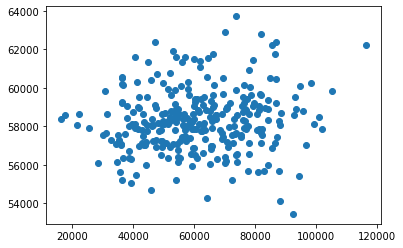

In [71]:
linr = LinearRegression()
linr = LinearRegression()
linr.fit(x_train, y_train)

pred_value = linr.predict(x_test)
error = (np.abs(pred_value - y_test)).mean()
print(error)
plt.scatter(y_test, pred_value)
plt.show()

### Random Forest Regression



In [72]:
## Random Forest
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x_train, y_train['Store_Sales'])
pred_rf = regr.predict(x_test)

In [73]:
## grid search for rf
List_depth = [5, 10, 20, 50, 100]
List_mae_rf = []

optimal_error = 1e10
optimal_depth = 0

for d in List_depth:
    regr = RandomForestRegressor(max_depth=d, random_state=0)
    regr.fit(x_train, y_train['Store_Sales'])
    pred_rf = regr.predict(x_test)

    mae_rf = mae(pred_rf, list(y_test['Store_Sales']))
    List_mae_rf.append(mae_rf)

    if mae_rf < optimal_error:
        optimal_depth = d
        optimal_error = mae_rf

In [74]:
print('best depth: ', optimal_depth)
print('Error: \t    ', optimal_error)

best depth:  5
Error: 	     14533.350863681137


In [75]:
px.scatter(x = List_depth, y = List_mae_rf)

In [76]:
## Calculate the Mean absolute error (MAE) for prediction

MAE_lin = mae(pred_value,list(y_test['Store_Sales']))
MAE_rf = mae(pred_rf,list(y_test['Store_Sales']))

### XGBoosting



In [77]:
# First XGB model

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(x_train_rm, y_train_rm['Store_Sales'])
y_pred = xgb_model.predict(x_test_rm)

MAE_XGB = mae(y_pred, list(y_test_rm['Store_Sales']))

In [78]:
# Second XGB model
data_dmatrix = xgb.DMatrix(data=x_train_zt,label=y_train_zt)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50)
xg_reg.fit(x_train_zt,y_train_zt)
preds = xg_reg.predict(x_test_zt)

In [79]:
data_dmatrix = xgb.DMatrix(data=x_train_rm,label=y_train_rm)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.091,
                max_depth = 1, alpha = 50, n_estimators = 70)
xg_reg.fit(x_train_rm,y_train_rm)
preds = xg_reg.predict(x_test_rm)

In [80]:
## grid search: method you get the optimal point for the regression.

List_estimators = [10, 20, 25, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50, 100]
List_mae = []

for n in List_estimators:
    data_dmatrix = xgb.DMatrix(data=x_train_rm,label=y_train_rm)
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                    max_depth = 10, alpha = 10, n_estimators = n)
    xg_reg.fit(x_train_rm,y_train_rm)
    preds = xg_reg.predict(x_test_rm)

    List_mae.append(mae(preds, list(y_test_rm['Store_Sales'])))

px.scatter(x = List_estimators, y = List_mae)

In [81]:
## grid search: method you get the optimal point for the regression.

List_learning_rate = [0.05, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.09, .1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.5]
List_mae = []

for l in List_learning_rate:
    data_dmatrix = xgb.DMatrix(data=x_train_rm,label=y_train_rm)
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = l,
                    max_depth = 10, alpha = 10, n_estimators = 40)
    xg_reg.fit(x_train_rm,y_train_rm)
    preds = xg_reg.predict(x_test_rm)

    List_mae.append(mae(preds, list(y_test_rm['Store_Sales'])))

In [82]:
px.scatter(x = List_learning_rate, y = List_mae)

In [83]:
List_max_depth = [1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
List_mae = []

for de in List_max_depth:
    data_dmatrix = xgb.DMatrix(data=x_train_rm,label=y_train_rm)
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.13,
                    max_depth = de, alpha = 10, n_estimators = 40)
    xg_reg.fit(x_train_rm,y_train_rm)
    preds = xg_reg.predict(x_test_rm)

    List_mae.append(mae(preds, list(y_test_rm['Store_Sales'])))

px.scatter(x=List_max_depth, y = List_mae)

In [84]:
List_colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
List_mae = []

for c in List_colsample_bytree:
    data_dmatrix = xgb.DMatrix(data=x_train_zt,label=y_train_zt)
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = c, learning_rate = 0.13,
                    max_depth = 1, alpha = 10, n_estimators = 32)
    xg_reg.fit(x_train_zt,y_train_zt)
    preds = xg_reg.predict(x_test_zt)

    List_mae.append(mae(preds, list(y_test_zt['Store_Sales'])))
    
px.scatter(x=List_colsample_bytree, y = List_mae)

In [85]:
List_alpha = [0.000001, 1, 5, 10, 20, 30, 40, 50, 75, 90, 91, 92, 93, 94, 95, 99, 100, 120, 140, 160, 180, 200, 500]
List_mae = []

for a in List_alpha:
    data_dmatrix = xgb.DMatrix(data=x_train_rm,label=y_train_rm)
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.13,
                    max_depth = 1, alpha = a, n_estimators = 40)
    xg_reg.fit(x_train_rm,y_train_rm)
    preds = xg_reg.predict(x_test_rm)

    List_mae.append(mae(preds, list(y_test_rm['Store_Sales'])))

px.scatter(x=List_alpha, y = List_mae)

In [86]:
#Final XGBoost Model 2
data_dmatrix = xgb.DMatrix(data=x_train_zt,label=y_train_zt)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.13,
                max_depth = 1, alpha = 94, n_estimators = 32)
xg_reg.fit(x_train_zt,y_train_zt)
preds1 = xg_reg.predict(x_test_zt)

#Mean absolute error
mae(list(y_test['Store_Sales']),preds1)

14510.275258657095

In [87]:
data_dmatrix = xgb.DMatrix(data=x_train_rm,label=x_train_rm)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.75, learning_rate = 1.23,
                max_depth = 3, alpha = 120, n_estimators = 250)
xg_reg.fit(x_train_rm,y_train_rm)
preds2 = xg_reg.predict(x_test_rm)

#Mean absolute error
mae_xgb = mae(list(y_test_rm['Store_Sales']),preds2)
mae_xgb

19106.32279079861

In [88]:
px.scatter(y_test_rm, preds2)

In [89]:
max(preds2)

103057.44

### Gradient Boosting \( Johanna \)



In [90]:
reg = GradientBoostingRegressor(n_estimators = 50,random_state=42)
reg.fit(x_train_rm, y_train_rm['Store_Sales'])
pred_gb = reg.predict(x_test_rm)
mae_gb = mae(pred_gb, list(y_test_rm['Store_Sales']))
print('MAE for Gradient Boosting: ',mae_gb)

MAE for Gradient Boosting:  15198.755876893145


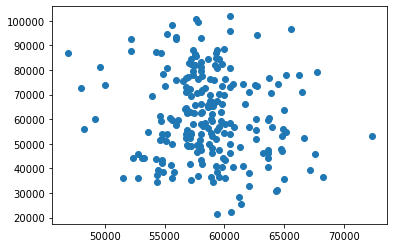

In [91]:
plt.scatter(pred_gb, list(y_test_rm['Store_Sales']))

In [92]:
reg = GradientBoostingRegressor(min_samples_split = 4, max_depth = 100, subsample = 0.14, n_estimators = 1200, criterion = 'friedman_mse')
reg.fit(x_train_rm, y_train_rm['Store_Sales'])
pred_gb = reg.predict(x_test_rm)

print('MAE for Gradient Boosting: ',mae(pred_gb, list(y_test_rm['Store_Sales'])))

px.scatter(x = pred_gb, y = list(y_test_rm['Store_Sales']))

MAE for Gradient Boosting:  18513.89665499731


### SVM \(Jen\)



### MLP \(Zakir\)



In [93]:
clf = MLPRegressor(hidden_layer_sizes=(6,5),random_state=42,max_iter=200,learning_rate_init=0.15)

clf.fit(x_train_rm,y_train_rm['Store_Sales'])

ypred = clf.predict(x_test_rm)

mae_mlp = mae(list(y_test_rm['Store_Sales']),ypred)
mae_mlp

/projects/1d81facf-cc6a-4793-a76e-965deb9ad4f9/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



14505.907604469063

In [94]:
fig = px.scatter(x = ypred, y= list(y_test_rm['Store_Sales']))

fig.update_layout(
    title="Prediction v.s. True Value",
    xaxis_title="Prediction",
    yaxis_title="True Value",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

### Polynomial Regression \(Samia\)



In [95]:
List_degree = [1, 2, 3, 4, 5]
List_mae_PR = []


for d in List_degree:
    pr = PolynomialFeatures(degree=d)
    X_Train_poly = pr.fit_transform(x_train_rm)
    X_Test_poly = pr.fit_transform(x_test_rm)

    lr = LinearRegression()
    lr.fit(X_Train_poly, y_train_rm)
    pred_poly2 = lr.predict(X_Test_poly)
    
    List_mae_PR.append(mae(pred_poly2, list(y_test['Store_Sales']))[0])

In [96]:
px.scatter(x = List_degree, y = List_mae_PR)

[13855.46009855]


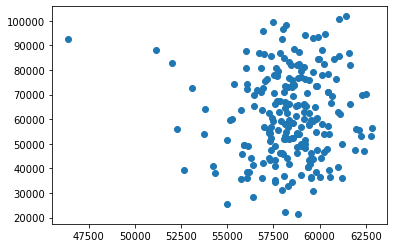

[13898.8787241]


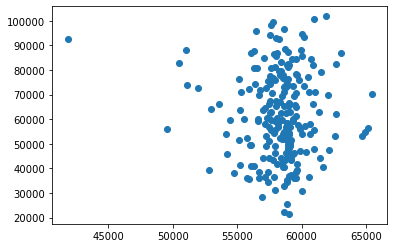

In [97]:
# degree = 2
pr = PolynomialFeatures(degree=2)

X_Train_poly = pr.fit_transform(x_train_rm)
X_Test_poly = pr.fit_transform(x_test_rm)

lr = LinearRegression()
lr.fit(X_Train_poly,y_train) #great

pred_poly2 = lr.predict(X_Test_poly)
mae_polyreg = mae(pred_poly2, list(y_test['Store_Sales']))
print(mae_polyreg)

plt.scatter(pred_poly2, y_test_rm)
plt.show()

# degree = 3
pr = PolynomialFeatures(degree=3)

X_Train_poly = pr.fit_transform(x_train_rm)
X_Test_poly = pr.fit_transform(x_test_rm)

# Remember to declare the model again whenever you want to fit new data
lr = LinearRegression()
lr.fit(X_Train_poly,y_train)

pred_poly3 = lr.predict(X_Test_poly)
print(mae(pred_poly3, list(y_test['Store_Sales'])))

plt.scatter(pred_poly3, y_test_rm)
plt.show()


In [98]:
print(mae_polyreg)

[13855.46009855]


### Decision Tree Regression \(April\)



In [99]:
List_depth = [1, 2, 3, 5, 8, 10, 30, 45, 60]
List_mae_dt = []
for d in List_depth:
    regr = DecisionTreeRegressor(max_depth = d)
    regr.fit(x_train_rm, y_train_rm)

    pred = regr.predict(x_test_rm)
    mae_dectr = mae(pred, list(y_test_rm['Store_Sales']))
    List_mae_dt.append(mae_dectr)

fig = px.scatter(x = List_depth, y= List_mae_dt)

fig.update_layout(
    title="MAE - Max Depth",
    xaxis_title="Max Depth",
    yaxis_title="MAE",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

mae_dectr

19012.48888888889

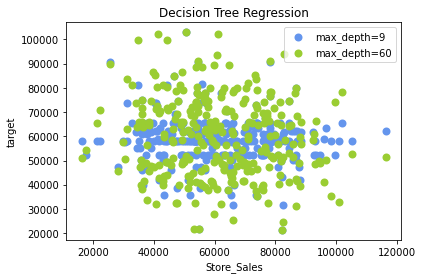

In [100]:
## fit regression model

regr_1 = DecisionTreeRegressor(max_depth=9)
regr_2 = DecisionTreeRegressor(max_depth=60)
regr_1.fit(x_train, y_train['Store_Sales'])
regr_2.fit(x_train, y_train['Store_Sales'])
## predict

y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)
## plot the results

plt.figure()
plt.scatter(y_test['Store_Sales'], y_1, color="cornflowerblue", label="max_depth=9", linewidth=2)
plt.scatter(y_test['Store_Sales'], y_2, color="yellowgreen", label="max_depth=60", linewidth=2)
plt.xlabel("Store_Sales")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


### Elastic Net



In [101]:
regr = ElasticNet(alpha = 0.8,l1_ratio = 0.8, random_state=42)
regr.fit(x_train_rm, y_train_rm['Store_Sales'])
pred_en = regr.predict(x_test_rm)
mae_enet = mae(pred_en, list(y_test_rm['Store_Sales']))
mae_enet

14533.451798521864

In [102]:
fig = px.scatter(x = pred_en, y= list(y_test_rm['Store_Sales']))

fig.update_layout(
    title="Prediction v.s. True Value",
    xaxis_title="Prediction",
    yaxis_title="True Value",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()

## Evaluation



In [103]:
print('MAE for Linear Regreesion:\t        ', round(MAE_lin[0],2))
print('MAE for Random Forest Regreesion:       ', round(MAE_rf,2))
print('MAE for XGBoosting Regreesion:\t        ', round(mae_xgb,2))
print('MAE for Gradient Boosting:\t        ', round(mae_gb,2))
print('MAE for Neural Network:\t                ', round(mae_mlp, 2))
print('MAE for Polynomial Regression:\t        ', round(mae(pred_poly2, list(y_test['Store_Sales']))[0], 2))
print('MAE for Decision Tree Regression:\t', round(mae_dectr, 2))
print('MAE for Elastic Net:\t                ', round(mae_enet, 2))
print('\n')
print('Goal for the MAE 0.lower than 13228')

MAE for Linear Regreesion:	         14294.48
MAE for Random Forest Regreesion:        15684.4
MAE for XGBoosting Regreesion:	         19106.32
MAE for Gradient Boosting:	         15198.76
MAE for Neural Network:	                 14505.91
MAE for Polynomial Regression:	         13855.46
MAE for Decision Tree Regression:	 19012.49
MAE for Elastic Net:	                 14533.45


Goal for the MAE lower than 13228


In [114]:
#Creating a dataframe to make a boxplot for the MAE of the different machine learning models

data = [['Linear Regreesion', 14294.48], ['Random Forest Regreesion',  15684.4], ['XGBoosting Regreesion', 19106.32], ['Gradient Boosting', 15198.76], ['Neural Network', 14505.91], ['Polynomial Regression', 13855.46], ['Decision Tree Regression', 19156.40], ['Elastic Net', 14533.45], ['Goal', 13228]]

MAE_df = pd.DataFrame(data, columns=['Model', 'Mean Absolute Error (MAE)'])
MAE_df

,Model,Mean Absolute Error (MAE)
0,Linear Regreesion,14294.48
1,Random Forest Regreesion,15684.40
2,XGBoosting Regreesion,19106.32
3,Gradient Boosting,15198.76
4,Neural Network,14505.91
5,Polynomial Regression,13855.46
6,Decision Tree Regression,19156.40
7,Elastic Net,14533.45
8,Goal,13228.00


In [115]:
#Making the boxplot from the dataframe above

fig = px.bar(MAE_df, x="Model", y="Mean Absolute Error (MAE)", color='Model', title="Machine Learning Models' MAE")
fig.show()
fig.write_html('/projects/1d81facf-cc6a-4793-a76e-965deb9ad4f9/SC22-BatchB-Fractal-Generator/app/static/assets/modelbarchart.html')